# 본 파일은 
# Data Science and Reinforcement Learning (2022년도, 1학기, M3239.004100_001)
# 최종 1차 과제제출을 위한 description 파일입니다.
# agent 재훈련을 위한 코드가 수록되어있으며, 
# 자세한 실행 방법은 주석으로 처리하였습니다.

In [1]:
import numpy as np
import gym
import random
from lava_grid import ZigZag6x10
from tqdm import tqdm
import math
from agent_lava_v2 import agent
import matplotlib.pyplot as plt

# 1. Performance

#### seed setting

In [2]:
np.random.seed(0)
random.seed(0)

#### defult environment setting

In [3]:
# default setting
max_steps = 100
stochasticity = 0 # probability of the selected action failing and instead executing any of the remaining 3
no_render = True

env = ZigZag6x10(max_steps=max_steps, act_fail_prob=stochasticity, goal=(5, 9), numpy_state=False)
s = env.reset()
done = False
cum_reward = 0.0

#### build agent

In [4]:
""" Your agent"""
my_agent = agent()

#### test 1 episode

In [5]:
# moving costs -0.01, falling in lava -1, reaching goal +1
# final reward is number_of_steps / max_steps
while not done:
    action = my_agent.action(s)
    # action = random.randrange(4): random actions
    ns, reward, done, _ = env.step(action)
    cum_reward += reward
    s = ns
print(f"total reward: {cum_reward}")

total reward: 0.8099999999999999


#### test n episode

In [6]:
n = 50
record = []
for i in range(n):
    while not done:
        action = my_agent.action(s)
        # action = random.randrange(4): random actions
        ns, reward, done, _ = env.step(action)
        cum_reward += reward
        s = ns
#     print(f"total reward: {cum_reward}")
    record.append(cum_reward)

#### result 

In [7]:
# result of n episode
print(record)

[0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999, 0.8099999999999999]

In [8]:
# print record count
record_count = {}
for i in record:
    if i in record_count:
        record_count[i] +=1
        
    else:
        record_count[i] = 1
print(record_count)

{0.8099999999999999: 50}


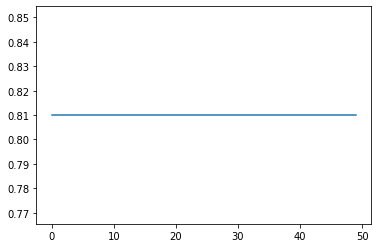

In [9]:
# plotting result
plt.plot(record)
plt.show()

# 2. Sample Efficiency

#### build agent & reset Q table

In [127]:
""" Your agent"""
my_agent = agent(epsilon=0)
my_agent.reset_q_table()

In [117]:
initialized_q_table = my_agent.q_table

for i in initialized_q_table:
    print(f"Q table of {i} state : {initialized_q_table[i]}")

Q table of 0 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 1 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 2 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 3 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 4 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 5 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 6 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 7 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 8 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 9 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 10 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 11 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 12 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 13 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 14 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 15 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 16 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 17 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 18 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 19 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 20 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 21 state : {

#### seed setting

In [118]:
np.random.seed(None)
random.seed(None)

#### train n episode

In [108]:
recordrecord6 = []

for i in range(10):
    num_episode = 3000
    # record reward of each episode
    record = my_agent.activate_learn(num_episode) 
    recordrecord6.append(sum(record))

In [46]:
# AUC of 1 train
sum(record)

2296.3999999998814

In [100]:
sum(recordrecord)/10 #0.001

2298.8709999998814

In [101]:
sum(recordrecord2)/10 #0.005

2286.3729999998823

In [102]:
sum(recordrecord3)/10 #0.01

2262.660999999884

In [103]:
sum(recordrecord4)/10 #0.01

2301.968999999881

In [104]:
sum(recordrecord5)/10 #0.01

2302.562999999881

In [71]:
from sklearn import metrics

metrics.auc([i for i in range(len(recordrecord3))], recordrecord3)

20683.30499999893

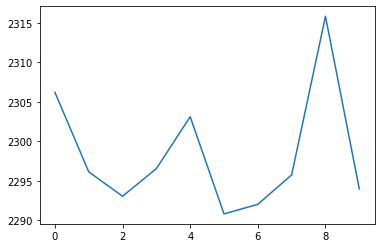

In [72]:
# plotting result
plt.plot(recordrecord3)
plt.show()

In [79]:
metrics.auc([i for i in range(len(recordrecord))], recordrecord) #0.001

20688.219999998928

In [84]:
metrics.auc([i for i in range(len(recordrecord2))], recordrecord2) #0.005

20574.73999999894

In [89]:
metrics.auc([i for i in range(len(recordrecord3))], recordrecord3) #0.01

20358.449999998957

In [94]:
metrics.auc([i for i in range(len(recordrecord4))], recordrecord4) #0.0005

20715.669999998925

In [99]:
metrics.auc([i for i in range(len(recordrecord5))], recordrecord5) #0.0001

20722.299999998926

In [109]:
metrics.auc([i for i in range(len(recordrecord6))], recordrecord6)#0

20761.89999999893

In [112]:
record[:200]

[-1.06,
 -1.06,
 -1.04,
 -1.33,
 -1.5000000000000002,
 -1.5100000000000002,
 -1.5100000000000002,
 -1.8900000000000006,
 -1.0000000000000007,
 -1.4200000000000002,
 -1.6100000000000003,
 -1.0000000000000007,
 -1.6100000000000003,
 -1.9900000000000007,
 -1.9200000000000006,
 -1.8600000000000005,
 -1.0000000000000007,
 -1.5300000000000002,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.9800000000000006,
 -1.0000000000000007,
 -1.8200000000000005,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.8800000000000006,
 -1.0000000000000007,
 0.0799999999999994,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.9800000000000006,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.0000000000000007,
 -1.8700000000000006,
 -1.0000000000000007,
 0.0699999999999994,
 -1.0000000000000007,
 0.09999999999999942,
 -1.0000000000000007,
 0.23999999999999955,
 0.10999999999999943,
 0.05999999999999939,
 0

In [135]:
for i, val in enumerate(record):
    if val == 0.8099999999999999:
        print(i)
        break

130


In [134]:
num_episode = 3000
# record reward of each episode
record = my_agent.activate_learn(num_episode) 
